# Load data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')  # Load main dataset
data = df.copy()
data.drop_duplicates('url', inplace=True)  # Create dataframe without duplicated news articles links

# Define global interest topics

In [3]:
ntopics = 10
topic_names = ['Politics BA Province', 'Economy/Dolar', 'Justice', 'Politics CL', '3rd Party', 'Wage/Inflation', 'Politics CR', 'Elections', 'Trash topic', 'Gossip & Sport']
topic_interest_global = data[[f'T{i}' for i in range(ntopics)]].mean().to_list()

# Calculate the share ratio

Shared ratio per topic, defined as the mean frequency of article sharing associated with each topic



In [4]:
y = df[[f'T{i}' for i in range(ntopics)]].sum().to_numpy()
norm = data[[f'T{i}' for i in range(ntopics)]].sum().to_numpy()
ratio = y / norm
index_sorted = sorted(range(ntopics), key = lambda x: ratio[x])

# Plot news articles topics

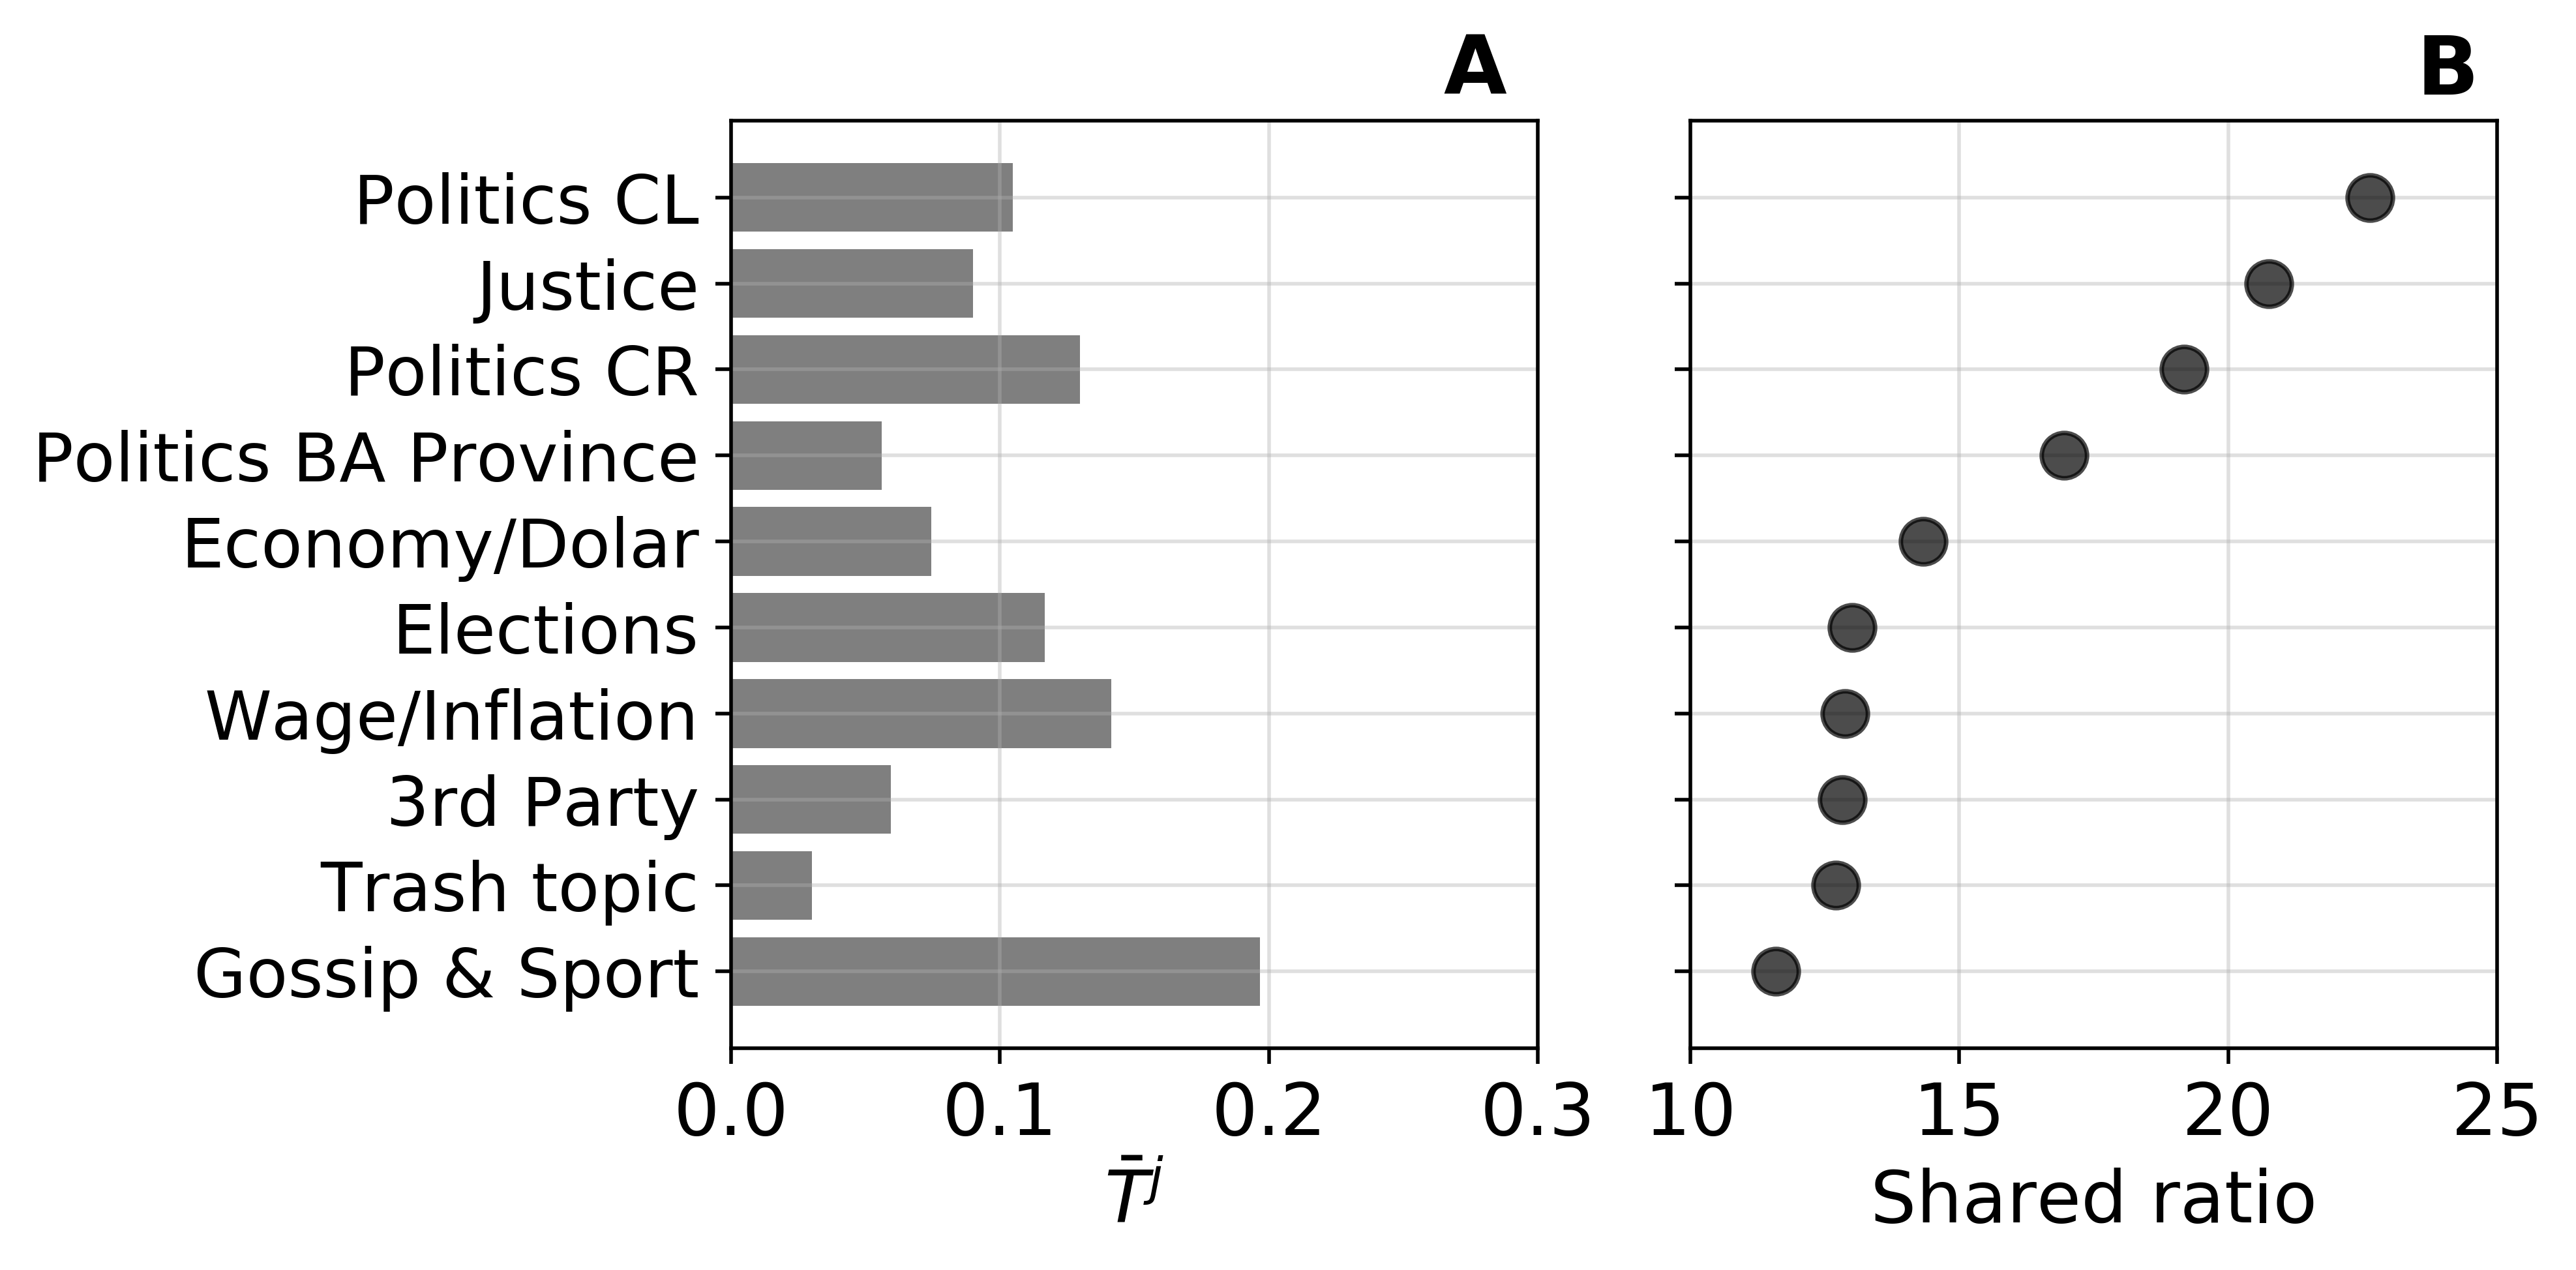

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4),dpi =500)

ax1.barh(range(ntopics), [topic_interest_global[i] for i in index_sorted], alpha=0.50, color='k')
ax1.set_yticks(range(ntopics))
ax1.set_yticklabels([topic_names[i] for i in index_sorted], size=15)
ax1.set_xlabel(r'$\bar{T}^j$', size=16)
ax1.set_xticks([np.round(x,2) for x in np.arange(0.00, 0.32, 0.10)])
ax1.set_xticklabels([np.round(x,2) for x in np.arange(0.00, 0.32, 0.10)], size=16)
ax1.grid(True, alpha=0.4)
ax1.text(0.265,10.2,'A',fontweight = 'bold',fontsize = 18)
ax2.plot([ratio[i] for i in index_sorted], range(ntopics), '.', markersize=20, alpha=0.70, color='k')
#ax2.set_yticks([])
ax2.set_xticks([10, 15, 20, 25])
ax2.set_xticklabels([10, 15, 20, 25], size=16)
ax2.set_xlim([10, 25])
ax2.grid(True, alpha=0.4)
ax2.set_xlabel('Shared ratio', size=16)
ax2.text(23.5,10.2,'B',fontweight = 'bold',fontsize = 18)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.savefig('figura4.pdf')
plt.show()

